# Telecom operator Megaline project

## Project description:
Telecom operator Megaline offers its clients two prepaid plans, Surf and Ultimate. 
The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
The purpose of this project is to conduct a preliminary analysis on data concerning these two plans. Database includes 5 datasets regarding: 
- (1) Users (names, ages, where they are from, what plan are they signed up for, when did they register, are they still registered). 
- (2)- info about their phone calls (amount, duration and dates, user id). 
- (3) info about messages (how many, dates, user id).
- (4) info about internet use (dates, Volume of data used, user id)
- (5) info about what each plan includes.
All data was based on a 500 client selection registered through-out 2018.

The purpose of this project is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

## Table of Content:
- 1  Project description:
- 2  Loading Data
- 3  Initial exploration of data
   - 3.1  Summary-
- 4  Data pre-processing
   - 4.1  Converting variables to the necessary data types
   - 4.2  Find and eliminate errors in the data
   - 4.3  Calls-
   - 4.4  Internet
   - 4.5  Messages:
   - 4.6  Plans:
   - 4.7  Users:
- 5  preparing variables for analysis:
   - 5.1  The number of calls made and minutes used per month:
   - 5.2  The number of text messages sent per month
   - 5.3  The volume of data per month
   - 5.4  Merging data-sets:
   - 5.5  The monthly revenue from each user
- 6  Analyzing data:
   - 6.1  Descriptive stat for each plan:
   - 6.2  - Surf plan:
     - 6.2.1  I. Call duration
     - 6.2.2  II. Number of messages:
     - 6.2.3  III. Volume of data:
   - 6.3  - Ultimate plan
     - 6.3.1  I. Call duration
     - 6.3.2  II. Number of messages:
     - 6.3.3  III. Volume of data:
   - 6.4  Summary:
- 7  Testing the hypotheses:
   - 7.1  1. Comparing average revenue from Surf and Ultimate calling plans:
   - 7.2  Conclusions for plan revenue:
   - 7.3  2. Comparing average revenue from users in NY-NJ area to other ereas:
- 8  General conclusions:

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
import seaborn as sns
import math 
from functools import reduce

In [2]:
try:
    df_calls = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Statistical Data Analysis\Project 3\megaline_calls.csv")
    df_internet = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Statistical Data Analysis\Project 3\megaline_internet.csv")
    df_messages = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Statistical Data Analysis\Project 3\megaline_messages.csv")
    df_plans = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Statistical Data Analysis\Project 3\megaline_plans.csv")
    df_users = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Statistical Data Analysis\Project 3\megaline_users1.csv")
except:
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
    df_messages = pd.read_csv('/datasets/megaline_messages.csv')
    df_plans = pd.read_csv('/datasets/megaline_plans.csv')
    df_users = pd.read_csv('/datasets/megaline_users.csv')
   
    

## Initial exploration of data

In [3]:
df_calls.head(3)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
df_internet.head(3)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
df_messages.head(3)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
 df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
 df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [11]:
df_users.head(3)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN


In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Summary-
There are 5 sets of data.
- df_calls : 4 columns and 137735 rows. No missing values. 'user_id' dtype should be changed from int64 to object.  
- df_internet: 4 columns and 104825 rows. No missing values. 'user_id' dtype should be changed from int64 to object.   
- df_messages: 3 columns and 76051 rows. No missing values. 'user_id' dtype should be changed from int64 to object.   
- df_plans: 8 columns and 2 rows. No missing values. 'usd_monthly_pay' and 'usd_per_gb' - should be changed from int to float. 
- df_users: 8 columns and 500 rows. 'churn_date ': a large number of missing values. churn dates are missing when user is still a client.'user_id' dtype should be changed from int64 to object

## Data pre-processing 

### Converting variables to the necessary data types

In [13]:
data_frames = [df_calls, df_internet, df_messages, df_users ]
for df in data_frames:
    df['user_id'] = df['user_id'].astype('object')


In [14]:
df_plans = df_plans.astype({'usd_monthly_pay': 'float64', 'usd_per_gb': 'float64'})
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


### Find and eliminate errors in the data
### Calls-

In [15]:
# Taking a closer look at the DFs:
df_calls.describe(include='all').T
# calls- min duration zero (?)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,137735,137735,1000_93,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,137735.0,481.0,1324.0,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_date,137735,351,2018-12-27,1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,137735.0,NaN,NaN,NaN,6.745927,5.839241,0.0,1.29,5.98,10.69,37.6


In [16]:
# checking the relative amount of duration==0: (~20%)
df_calls[df_calls['duration'] == 0]['duration'].count()/len(df_calls)

0.1948233927469416

In [17]:
# checking if duration==0 is random: (looks like '0' is usually between September and December)
df_calls.query('duration == 0').tail(15)

,id,user_id,call_date,duration
137636,1499_105,1499,2018-09-18,0.0
137659,1499_128,1499,2018-09-07,0.0
137661,1499_130,1499,2018-12-18,0.0
137679,1499_148,1499,2018-12-04,0.0
137690,1499_159,1499,2018-11-04,0.0
137694,1499_163,1499,2018-09-24,0.0
137695,1499_164,1499,2018-10-26,0.0
137697,1499_166,1499,2018-10-15,0.0
137698,1499_167,1499,2018-10-13,0.0
137704,1499_173,1499,2018-10-10,0.0


In [18]:
#creating a month column for all data-sets.
# next stage would be to compare df_calls with duration==0, to the rest of durations and check if there is a difference in months.
df_calls['month'] = pd.to_datetime(df_calls['call_date']).dt.month
df_internet['month'] = pd.to_datetime(df_internet['session_date']).dt.month
df_messages['month'] = pd.to_datetime(df_messages['message_date']).dt.month

In [19]:
# checking possible difference in distribution of duration ==0 (Not found- most calls are made between August and December- near the end of the calander year)
call_duration0 = df_calls.query('duration == 0')
call_duration_no0 = df_calls.query('duration != 0')

In [20]:
call_duration0['month'].describe()

count    26834.000000
mean         9.327271
std          2.402327
min          1.000000
25%          8.000000
50%         10.000000
75%         11.000000
max         12.000000
Name: month, dtype: float64

In [21]:
call_duration_no0['month'].describe()

count    110901.000000
mean          9.319231
std           2.415025
min           1.000000
25%           8.000000
50%          10.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64

In [22]:
df_calls = df_calls.query('duration != 0')

*Call duration = zero*: there are 20% such calls, randomly distributed across data.I couldn't find an explanation to it- might be an error, a wrong number or a quick answering machine- There is no way of knowing.
Although it is 20% of data i prefered dropping these rows. Zero duration is not supppose to affect the revenue, but might affect calculatins of mean duration call.

### Internet

In [23]:
df_internet.describe(include='all').T
# Internet - min mb_used is zero + are there outliers?

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,104825,104825,1000_13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,104825.0,489.0,1185.0,851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
session_date,104825,351,2018-12-24,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,104825.0,NaN,NaN,NaN,366.713701,277.170542,0.0,136.08,343.98,554.61,1693.47
month,104825.0,NaN,NaN,NaN,9.342552,2.400404,1.0,8.0,10.0,11.0,12.0


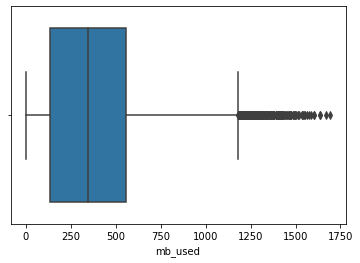

In [24]:
# Checking for outliers:
bxplt= sns.boxplot(x=df_internet['mb_used'])
plt.show()

In [25]:
ninety_nine = np.percentile(df_internet['mb_used'], 99)
('The value of mb_used located in the 99th percentile is:{}'.format(ninety_nine))

'The value of mb_used located in the 99th percentile is:1080.3007999999995'

#Although these values look like outliers, i decide to keep them (thinking of crazy gamers..)

In [26]:
mb_used0 = df_internet.query('mb_used == 0')
mb_used_no0 = df_internet.query('mb_used != 0')

In [27]:
mb_used0.describe()

,mb_used,month
count,13747.0,13747.000000
mean,0.0,9.365025
std,0.0,2.407617
min,0.0,1.000000
25%,0.0,8.000000
50%,0.0,10.000000
75%,0.0,11.000000
max,0.0,12.000000


In [28]:
mb_used_no0.describe()

,mb_used,month
count,91078.000000,91078.000000
mean,422.064206,9.339160
std,255.063501,2.399309
min,0.010000,1.000000
25%,223.380000,8.000000
50%,395.905000,10.000000
75%,588.367500,11.000000
max,1693.470000,12.000000


#mb_used = zero: As with calls, the same here- the zero value comprises 13% of data and randomly distributed. To not damage any mean calculations i might want to run, i decideג to drop these rows.

In [29]:
df_internet = df_internet.query('mb_used != 0')

In [30]:
df_internet.shape

(91078, 5)

### Messages:

In [31]:
df_messages.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,76051,76051,1000_125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,76051.0,402.0,1132.0,1288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message_date,76051,351,2018-12-28,702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,76051.0,NaN,NaN,NaN,9.584016,2.276392,1.0,8.0,10.0,12.0,12.0


#### Plans:

In [32]:
df_plans.describe(include='all').T
 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
messages_included,2.0,NaN,NaN,NaN,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,NaN,NaN,NaN,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,NaN,NaN,NaN,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
usd_monthly_pay,2.0,NaN,NaN,NaN,45.0,35.355339,20.0,32.5,45.0,57.5,70.0
usd_per_gb,2.0,NaN,NaN,NaN,8.5,2.12132,7.0,7.75,8.5,9.25,10.0
usd_per_message,2.0,NaN,NaN,NaN,0.02,0.014142,0.01,0.015,0.02,0.025,0.03
usd_per_minute,2.0,NaN,NaN,NaN,0.02,0.014142,0.01,0.015,0.02,0.025,0.03
plan_name,2,2,surf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Users:

In [33]:
df_users.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,500.0,500.0,1000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,500,458,Leonila,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,399,David,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,500.0,NaN,NaN,NaN,45.486,16.972269,18.0,30.0,46.0,61.0,75.0
city,500,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,266,2018-03-08,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tariff,500,2,surf,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn_date,34,29,2018-12-18,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### No duplicates:

In [34]:
# Looking for possible duplicates: None were found
df_calls.duplicated().sum()

0

In [35]:
df_internet.duplicated().sum()

0

In [36]:
df_messages.duplicated().sum()

0

In [37]:
df_users.duplicated().sum()

0

In [38]:
df_plans.duplicated().sum()

0

## preparing variables for analysis:

In [39]:
# rounding up duration calls:
#df_calls['duration'] = [math.ceil(number) for number in df_calls['duration']]
#df_calls['duration'] = df_calls['duration'].astype(int)
#df_calls.head()

In [40]:
#(Indeed, much better. Thanks!)
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)
df_calls.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_7232/533170184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


In [41]:
# changing dtype for reg_date as well:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

In [42]:
# creating an id to indicate plan name:
def plan_id (plan_name):
    if plan_name == 'surf':
        return 0
    elif plan_name == 'ultimate':
        return 1
    return 2

In [43]:
df_users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date',
       'tariff', 'churn_date'],
      dtype='object')

In [44]:
df_plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [45]:
df_plans['plan_name_id'] = df_plans['plan_name'].apply(plan_id)
df_users['plan_name_id'] = df_users['tariff'].apply(plan_id)
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,plan_name_id
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,0


### The number of calls made and minutes used per month:


In [46]:
df_calls_monthly = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
df_calls_monthly.columns=['monthly_calls', 'monthly_minutes']
df_calls_monthly

monthly_calls  monthly_minutes
user_id month                                
1000    12                16              124
1001    8                 22              182
        9                 38              315
        10                47              393
        11                49              426
...                      ...              ...
1498    12                32              339
1499    9                 35              346
        10                41              385
        11                39              308
        12                56              496

[2256 rows x 2 columns]

### The number of text messages sent per month

In [47]:
df_messages_monthly = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
df_messages_monthly.columns=['monthly_texting']
df_messages_monthly

monthly_texting
user_id month                 
1000    12                  11
1001    8                   30
        9                   44
        10                  53
        11                  36
...                        ...
1496    9                   21
        10                  18
        11                  13
        12                  11
1497    12                  50

[1806 rows x 1 columns]

### The volume of data per month

In [48]:
df_internet_monthly = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
df_internet_monthly.columns=['monthly_data_volume_mb']
df_internet_monthly


monthly_data_volume_mb
user_id month                        
1000    12                    1901.47
1001    8                     6919.15
        9                    13314.82
        10                   22330.49
        11                   18504.30
...                               ...
1498    12                   23137.69
1499    9                    12984.76
        10                   19492.43
        11                   16813.83
        12                   22059.21

[2277 rows x 1 columns]

In [49]:
# Transforming mb to gb:
mb_to_gb = 0.001
df_internet_monthly['monthly_gb_used'] = df_internet_monthly['monthly_data_volume_mb'] * mb_to_gb
df_internet_monthly

monthly_data_volume_mb  monthly_gb_used
user_id month                                         
1000    12                    1901.47          1.90147
1001    8                     6919.15          6.91915
        9                    13314.82         13.31482
        10                   22330.49         22.33049
        11                   18504.30         18.50430
...                               ...              ...
1498    12                   23137.69         23.13769
1499    9                    12984.76         12.98476
        10                   19492.43         19.49243
        11                   16813.83         16.81383
        12                   22059.21         22.05921

[2277 rows x 2 columns]

In [50]:
# rounding up the monthly data volume for each user:
df_internet_monthly['monthly_gb_used'] = np.ceil(df_internet_monthly['monthly_gb_used']).astype(int)

df_internet_monthly.head()

monthly_data_volume_mb  monthly_gb_used
user_id month                                         
1000    12                    1901.47                2
1001    8                     6919.15                7
        9                    13314.82               14
        10                   22330.49               23
        11                   18504.30               19

### Merging data-sets:

In [51]:
data_frames = [df_calls_monthly, df_messages_monthly, df_internet_monthly]
df_merged = reduce(lambda left, right:pd.merge(left, right, on=['user_id', 'month'], how='outer'), data_frames).reset_index()

In [52]:
print(len(df_merged))

2293


In [53]:
df_merged = pd.merge(left=df_merged, right=df_users, how='left', on='user_id')


In [54]:
df_merged.tail()

,user_id,month,monthly_calls,monthly_minutes,monthly_texting,monthly_data_volume_mb,monthly_gb_used,first_name,last_name,age,city,reg_date,tariff,churn_date,plan_name_id
2288,1407,11,NaN,NaN,1.0,290.06,1.0,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN,1
2289,1482,10,NaN,NaN,2.0,NaN,NaN,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaN,1
2290,1094,10,NaN,NaN,NaN,1728.71,2.0,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12,0
2291,1108,12,NaN,NaN,NaN,233.17,1.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaN,1
2292,1311,6,NaN,NaN,NaN,1498.83,2.0,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaN,1


In [55]:
df_plans.head(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_name_id
0,50,15360,500,20.0,10.0,0.03,0.03,surf,0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,1


### The monthly revenue from each user

In [56]:
df_merged.columns


Index(['user_id', 'month', 'monthly_calls', 'monthly_minutes',
       'monthly_texting', 'monthly_data_volume_mb', 'monthly_gb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'tariff',
       'churn_date', 'plan_name_id'],
      dtype='object')

In [57]:
# a function to calculate the total cost for each user:

def cost (row):
    calls = row['monthly_minutes']
    messages = row['monthly_texting']
    internet_gb = row['monthly_gb_used']
    internet_mb = row['monthly_data_volume_mb']
    plan = row['tariff']
    plan_cost = 0
    call_cost = 0
    message_cost = 0
    internet_cost = 0
    total_cost = 0
    gb_included_ulti = 30
    gb_included_surf = 15
    if plan == 'ultimate':
        plan_cost = df_plans['usd_monthly_pay'].max()
        if calls > df_plans['minutes_included'].max():
            call_cost = (calls - df_plans['minutes_included'].max()* df_plans['usd_per_minute'].min())
        if messages > df_plans['messages_included'].max():
            message_cost = (messages - df_plans['messages_included'].max() * df_plans['usd_per_message'].min())
        if internet_mb > df_plans['mb_per_month_included'].max():
            internet_cost = (internet_gb - gb_included_ulti) * df_plans['usd_per_gb'].min()
    elif plan == 'surf':
        plan_cost = df_plans['usd_monthly_pay'].min()
        if calls > df_plans['minutes_included'].min():
            call_cost = (calls - df_plans['minutes_included'].min()* df_plans['usd_per_minute'].max())
        if messages > df_plans['messages_included'].min():
            message_cost = (messages - df_plans['messages_included'].min() * df_plans['usd_per_message'].max())
        if internet_mb > df_plans['mb_per_month_included'].min():
            internet_cost = (internet_gb - gb_included_surf) * df_plans['usd_per_gb'].max()
        
    total_cost = plan_cost + call_cost + message_cost + internet_cost
    return total_cost

In [58]:
df_merged['total_cost'] = df_merged.apply(cost, axis=1)
df_merged.head()

,user_id,month,monthly_calls,monthly_minutes,monthly_texting,monthly_data_volume_mb,monthly_gb_used,first_name,last_name,age,city,reg_date,tariff,churn_date,plan_name_id,total_cost
0,1000,12,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1,70.0
1,1001,8,22.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,20.0
2,1001,9,38.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,20.0
3,1001,10,47.0,393.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,151.5
4,1001,11,49.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,60.0


In [59]:
# checking for missing values in the merged df:

df_merged.isnull().sum()/len(df_merged)

user_id                   0.000000
month                     0.000000
monthly_calls             0.016136
monthly_minutes           0.016136
monthly_texting           0.212386
monthly_data_volume_mb    0.006978
monthly_gb_used           0.006978
first_name                0.000000
last_name                 0.000000
age                       0.000000
city                      0.000000
reg_date                  0.000000
tariff                    0.000000
churn_date                0.931095
plan_name_id              0.000000
total_cost                0.000000
dtype: float64

#### looks like churn_data is missing too much data to be used, and monthly_texting is missing 21.6% of data, which makes sense as the df_messages was indeed quite small).

## Analyzing data:
Describe the customers' behavior. Find the minutes, texts, and volume of data the
users of each plan require per month. Calculate the mean, variance, and standard
deviation. Plot histograms. Describe the distributions.

### Descriptive stat for each plan:


In [60]:
df_ultimate = df_merged.query('plan_name_id == 1')
df_surf = df_merged.query('plan_name_id == 0')

###    -  Surf plan:

#### I. Call duration

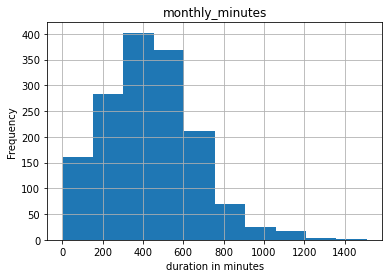

The distribution of call minutes has a positive/right skew
surf plan minutes median: 430.0
surf plan minutes mean: 436.8
surf plan minutes variance: 52447.57
surf plan minutes standard deviation: 229.01


In [61]:
# descriptive stat for call duration:
surf_calls_mean = round(df_surf['monthly_minutes'].mean(), 2)
surf_calls_median = round(df_surf['monthly_minutes'].median(), 2)
surf_calls_var = round(np.var(df_surf['monthly_minutes']), 2)
surf_calls_std = round(np.sqrt(surf_calls_var), 2)
df_surf.hist('monthly_minutes')
plt.xlabel('duration in minutes')
plt.ylabel('Frequency')
plt.show()
if surf_calls_mean > surf_calls_median:
    print('The distribution of call minutes has a positive/right skew')
elif surf_calls_mean < surf_calls_median:
    print('The distribution of call minutes has a negative/left skew')
else:
    print ('The distribution of call minutes is a normal distribution')

print('surf plan minutes median:', surf_calls_median)
print('surf plan minutes mean:', surf_calls_mean)
print('surf plan minutes variance:', surf_calls_var)
print('surf plan minutes standard deviation:', surf_calls_std)


#### II. Number of messages:

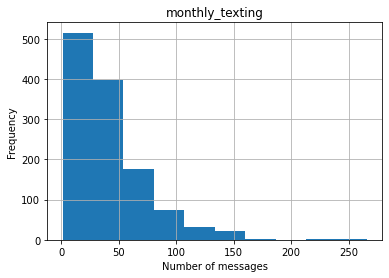

The distribution of texting has a positive/right skew
surf plan texting median: 32.0
surf plan texting mean: 40.11
surf plan texting variance: 1090.45
surf plan texting standard deviation: 33.02


In [62]:
surf_messages_mean = round(df_surf['monthly_texting'].mean(), 2)
surf_messages_median = round(df_surf['monthly_texting'].median(), 2)
surf_messages_var = round(np.var(df_surf['monthly_texting']), 2)
surf_messages_std = round(np.sqrt(surf_messages_var), 2)
df_surf.hist('monthly_texting')
plt.xlabel('Number of messages')
plt.ylabel('Frequency')
plt.show()
if surf_messages_mean > surf_messages_median:
    print('The distribution of texting has a positive/right skew')
elif surf_messages_mean < surf_messages_median:
    print('The distribution of texting has a negative/left skew')
else:
    print ('The distribution of texting is a normal distribution')
print('surf plan texting median:', surf_messages_median)    
print('surf plan texting mean:', surf_messages_mean)
print('surf plan texting variance:', surf_messages_var)
print('surf plan texting standard deviation:', surf_messages_std)


#### III. Volume of data:

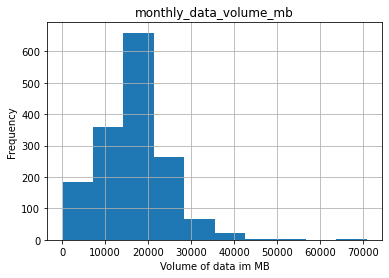

The distribution of Mb used has a negative/left skew
surf plan Mb used median: 16923.83
surf plan Mb used mean: 16717.7
surf plan Mb used variance: 62128323.16
surf plan Mb used standard deviation: 7882.15


In [63]:
surf_mb_used_mean = round(df_surf['monthly_data_volume_mb'].mean(), 2)
surf_mb_used_median = round(df_surf['monthly_data_volume_mb'].median(), 2)
surf_mb_used_var = round(np.var(df_surf['monthly_data_volume_mb']), 2)
surf_mb_used_std = round(np.sqrt(surf_mb_used_var), 2)
df_surf.hist('monthly_data_volume_mb')
plt.xlabel('Volume of data im MB')
plt.ylabel('Frequency')
plt.show()
if surf_mb_used_mean > surf_mb_used_median:
    print('The distribution of Mb used has a positive/right skew')
elif surf_mb_used_mean < surf_mb_used_median:
    print('The distribution of Mb used has a negative/left skew')
else:
    print ('The distribution of Mb used is a normal distribution')
print('surf plan Mb used median:', surf_mb_used_median)    
print('surf plan Mb used mean:', surf_mb_used_mean)
print('surf plan Mb used variance:', surf_mb_used_var)
print('surf plan Mb used standard deviation:', surf_mb_used_std)


###  - Ultimate plan

#### I. Call duration

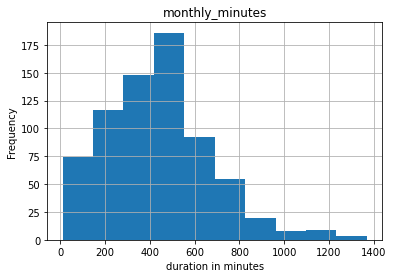

The distribution of call minutes has a positive/right skew
ultimate plan minutes median: 425.5
ultimate plan minutes mean: 435.29
ultimate plan minutes variance: 56307.89
ultimate plan minutes standard deviation: 237.29


In [64]:
# descriptive stat for call duration:
ultimate_calls_mean = round(df_ultimate['monthly_minutes'].mean(), 2)
ultimate_calls_median = round(df_ultimate['monthly_minutes'].median(), 2)
ultimate_calls_var = round(np.var(df_ultimate['monthly_minutes']), 2)
ultimate_calls_std = round(np.sqrt(ultimate_calls_var), 2)
df_ultimate.hist('monthly_minutes')
plt.xlabel('duration in minutes')
plt.ylabel('Frequency')
plt.show()
if ultimate_calls_mean > ultimate_calls_median:
    print('The distribution of call minutes has a positive/right skew')
elif ultimate_calls_mean < ultimate_calls_median:
    print('The distribution of call minutes has a negative/left skew')
else:
    print ('The distribution of call minutes is a normal distribution')

print('ultimate plan minutes median:', ultimate_calls_median)
print('ultimate plan minutes mean:', ultimate_calls_mean)
print('ultimate plan minutes variance:', ultimate_calls_var)
print('ultimate plan minutes standard deviation:', ultimate_calls_std)


#### II. Number of messages:

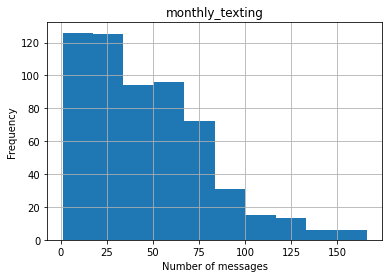

The distribution of texting has a positive/right skew
ultimate plan texting median: 41.0
ultimate plan texting mean: 46.3
ultimate plan texting variance: 1083.32
ultimate plan texting standard deviation: 32.91


In [65]:
ultimate_messages_mean = round(df_ultimate['monthly_texting'].mean(), 2)
ultimate_messages_median = round(df_ultimate['monthly_texting'].median(), 2)
ultimate_messages_var = round(np.var(df_ultimate['monthly_texting']), 2)
ultimate_messages_std = round(np.sqrt(ultimate_messages_var), 2)
df_ultimate.hist('monthly_texting')
plt.xlabel('Number of messages')
plt.ylabel('Frequency')
plt.show()
if ultimate_messages_mean > ultimate_messages_median:
    print('The distribution of texting has a positive/right skew')
elif ultimate_messages_mean < ultimate_messages_median:
    print('The distribution of texting has a negative/left skew')
else:
    print ('The distribution of texting is a normal distribution')
print('ultimate plan texting median:', ultimate_messages_median)    
print('ultimate plan texting mean:', ultimate_messages_mean)
print('ultimate plan texting variance:', ultimate_messages_var)
print('ultimate plan texting standard deviation:', ultimate_messages_std)


#### III. Volume of data:

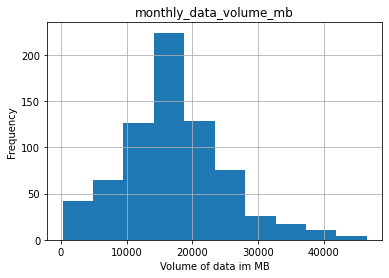

The distribution of Mb used has a positive/right skew
ultimate plan Mb used median: 16863.45
ultimate plan Mb used mean: 17238.64
ultimate plan Mb used variance: 61239556.12
ultimate plan Mb used standard deviation: 7825.57


In [66]:
ultimate_mb_used_mean = round(df_ultimate['monthly_data_volume_mb'].mean(), 2)
ultimate_mb_used_median = round(df_ultimate['monthly_data_volume_mb'].median(), 2)
ultimate_mb_used_var = round(np.var(df_ultimate['monthly_data_volume_mb']), 2)
ultimate_mb_used_std = round(np.sqrt(ultimate_mb_used_var), 2)
df_ultimate.hist('monthly_data_volume_mb')
plt.xlabel('Volume of data im MB')
plt.ylabel('Frequency')
plt.show()
if ultimate_mb_used_mean > ultimate_mb_used_median:
    print('The distribution of Mb used has a positive/right skew')
elif ultimate_mb_used_mean < ultimate_mb_used_median:
    print('The distribution of Mb used has a negative/left skew')
else:
    print ('The distribution of Mb used is a normal distribution')
print('ultimate plan Mb used median:', ultimate_mb_used_median)    
print('ultimate plan Mb used mean:', ultimate_mb_used_mean)
print('ultimate plan Mb used variance:', ultimate_mb_used_var)
print('ultimate plan Mb used standard deviation:', ultimate_mb_used_std)


### Summary:


* Note: While Examining the two distributions, especially through the histograms, bare in mind that there are more thn twice as much customers in the basic "surf" plan, compared with the "ultimate" plan.
* Comparison of the two plans' des. stat.:

**Call Duration**: Distributions are very similar, with almost equal means and std.
 The Distributions have a positive/right skew.

**Texting**: Distributions of both plans are very similar- both have a positive/right skew. However, the mean and median measures show that the ultimate clients sended on average more messages than the surf clients do, and the median is higher for the as well. (It is not clear yet, however if this dif is sig.)

**Surfing**: Distributions are very similar, with almost equal means and std (mean is slightly (probably not significantly)higher for the ultimate clients, while the median is the other way around).
 The Distributions look similar when observing the histograms, although for the surf plan the distribution is almost normal (mean~= median), with a slight negative skew, whereas the ultimate distribution has a slight positive skew.
 - An interesting observation concerns the min values of internet use. It seems that we were right to drop the zero values, as they were indeed probably outlier (the next low values are 92 and 233 for surf and ultimate clients, respectively). 


In [67]:
df_ultimate.describe()

,month,monthly_calls,monthly_minutes,monthly_texting,monthly_data_volume_mb,monthly_gb_used,age,plan_name_id,total_cost
count,720.000000,712.000000,712.000000,584.000000,719.000000,719.000000,720.000000,720.0,720.000000
mean,9.151389,49.191011,435.286517,46.296233,17238.642253,17.744089,47.719444,1.0,72.654167
std,2.558495,26.457567,237.459650,32.942118,7831.018323,7.842896,16.804088,0.0,12.669924
min,1.000000,2.000000,10.000000,1.000000,233.170000,1.000000,18.000000,1.0,70.000000
25%,8.000000,30.000000,263.000000,21.000000,12671.130000,13.000000,34.000000,1.0,70.000000
50%,10.000000,48.000000,425.500000,41.000000,16863.450000,17.000000,48.500000,1.0,70.000000
75%,11.000000,64.000000,566.000000,66.000000,21025.155000,22.000000,64.000000,1.0,70.000000
max,12.000000,156.000000,1369.000000,166.000000,46595.330000,47.000000,75.000000,1.0,189.000000


In [68]:
df_surf.describe()

,month,monthly_calls,monthly_minutes,monthly_texting,monthly_data_volume_mb,monthly_gb_used,age,plan_name_id,total_cost
count,1573.000000,1544.000000,1544.000000,1222.000000,1558.000000,1558.000000,1573.000000,1573.0,1573.000000
mean,9.182454,49.143135,436.802461,40.109656,16717.702137,17.201540,44.379530,0.0,314.778131
std,2.468199,25.304258,229.088544,33.035500,7884.682983,7.877707,16.646535,0.0,353.081981
min,1.000000,1.000000,2.000000,1.000000,92.310000,1.000000,18.000000,0.0,20.000000
25%,8.000000,32.000000,279.000000,16.000000,12187.955000,13.000000,29.000000,0.0,20.000000
50%,10.000000,48.000000,430.000000,32.000000,16923.830000,17.000000,45.000000,0.0,100.000000
75%,11.000000,65.000000,579.000000,54.000000,21039.860000,22.000000,59.000000,0.0,637.000000
max,12.000000,167.000000,1510.000000,266.000000,70931.590000,71.000000,75.000000,0.0,1868.500000


Text(0, 0.5, 'Frequency')

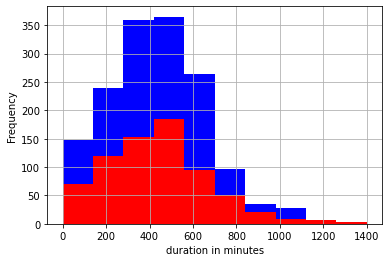

In [69]:
df_surf['monthly_minutes'].hist(range= (0,1400), color='blue')
df_ultimate['monthly_minutes'].hist(range= (0,1400), color='red')
plt.xlabel('duration in minutes')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

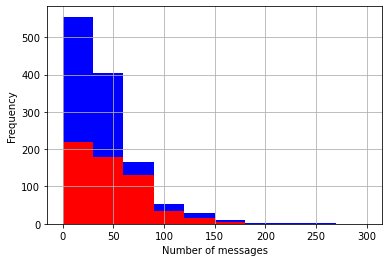

In [70]:
df_surf['monthly_texting'].hist(range= (0,300), color='blue')
df_ultimate['monthly_texting'].hist(range= (0,300), color='red')
plt.xlabel('Number of messages')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

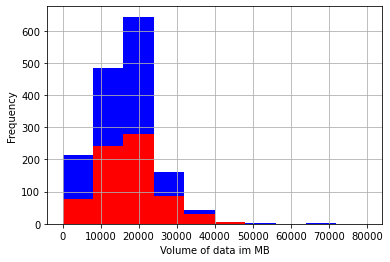

In [71]:
df_surf['monthly_data_volume_mb'].hist(range= (0,80000), color='blue')
df_ultimate['monthly_data_volume_mb'].hist(range= (0,80000), color='red')
plt.xlabel('Volume of data im MB')
plt.ylabel('Frequency')


## Testing the hypotheses:
Two hypotheses were made- one regarding a possible significant difference in revenue between customers of the "surf" plan and customers of the "ultimate" plan, and the other concerned posssible differences in revenue between to NY-NJ area and the other areas.


### 1. Comparing average revenue from Surf and Ultimate calling plans:
- H0: The null hypothesis was that no difference would be found between the average revenue from the "surf" plan users, and the "ultimate" plan users.
- H1: The alternative hypothesis was that a significant difference would be found in the revenue from these two plan.


In [72]:
# checking the equal variance assumption: [Significant difference between variances has been established (H0 can be rejected)]
st.levene(df_surf['total_cost'], df_ultimate['total_cost'], center = 'mean')

LeveneResult(statistic=2851.643912853271, pvalue=0.0)

In [73]:
# independent t-test with equal_var = False:
alpha = 0.05
result1 = st.ttest_ind(df_surf['total_cost'], df_ultimate['total_cost'], equal_var = False)
print ('p-value:', result1.pvalue)
if result1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
print('surf mean:', df_surf['total_cost'].mean())
print('ultimate mean:', df_ultimate['total_cost'].mean())

p-value: 1.2429912364454623e-133
We reject the null hypothesis
surf mean: 314.7781309599491
ultimate mean: 72.65416666666667


#### Conclusions for plan revenue:
Our null hypothesis was that the two plans do not differ in terms of their average total cost. We wanted to test if this was true. I chose to use the conventional threshold of 5% (alpha= 0.05) as a probability risk measure.

First, i tested whether there is a sig. difference between the two dfs variances. Levenes test showed that there was. Hence, i ran the independant sample t-test under the assumption of non-equal variances. Result showed that the average revenue (or the total cost) from the surf plan is significantly higher than the one from the ultimate program.

### 2. Comparing average revenue from users in NY-NJ area to other ereas:
- H0: The null hypothesis was that no difference would be found between the revenue from users living in NY-NJ area, and users living in other areas.
- H1: The alternative hypothesis was that a significant difference would be found in the revenue from these two areas.

In [74]:
# Sub-setting by area:
ny_nj_users = df_merged[df_merged['city'].str.contains("NY-NJ")]
other_regions = df_merged[~df_merged['city'].str.contains("NY-NJ")]

In [75]:
ny_nj_users['city'].head()

56    New York-Newark-Jersey City, NY-NJ-PA MSA
57    New York-Newark-Jersey City, NY-NJ-PA MSA
75    New York-Newark-Jersey City, NY-NJ-PA MSA
76    New York-Newark-Jersey City, NY-NJ-PA MSA
77    New York-Newark-Jersey City, NY-NJ-PA MSA
Name: city, dtype: object

In [76]:
# checking the equal variance assumption: [Significant difference between variances has been established (H0 can be rejected)]
st.levene(ny_nj_users['total_cost'], other_regions['total_cost'], center = 'mean')

LeveneResult(statistic=7.844074492035576, pvalue=0.0051415441496986515)

In [77]:
# independent t-test with equal_var = False:
alpha = 0.05
result2 = st.ttest_ind(ny_nj_users['total_cost'], other_regions['total_cost'], equal_var = False)
print ('p-value:', result2.pvalue)
if result2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
print("NY-NJ's area mean:", ny_nj_users['total_cost'].mean())
print("Other regions' mean:", other_regions['total_cost'].mean())

p-value: 0.05821829565466183
We can't reject the null hypothesis
NY-NJ's area mean: 266.87931034482756
Other regions' mean: 233.21685803757828


#### Conclusions for area revenue:
Our null hypothesis was that users living in the NY-NJ area do not differ in terms of their average total cost from users living in other areas. I chose to use the conventional threshold of 5% (alpha= 0.05) as a probability risk measure.

First, i tested whether there is a sig. difference between the two groups' variances. Levenes test showed that there was. Hence, i ran the independant sample t-test under the assumption of non-equal variances. 
Result showed that the average revenue (or total cost) from the NY-NJ users is not significantly different than the one from users living in other regions (although the average cost paid by them us slightly higher).

## General conclusions:

This project was ordered by the commercial department of "Telecom operator Megaline" company.
The central question guiding the analysis concerened the revenues of the two pre-paid plans, Surf and Ultimate. 
The commercial department wanted to know which of the plans brings in more revenue in order to adjust the advertising budget. 
In this analysis we carried out a preliminary analysis of data on 500 Megaline clients.


Databases included 5 data sheets collected over a year (2018).
Data included info about the clients names, ages, where they're from, and which plan they use. Also there was data about the number and length of the calls they made, text messages they sent and volume of data they used when surfing the net.

The analysis included a few stages:
 - ***Preprocessing***: There were no missing values or duplicated data rows. However, 20% of call durations were listed as '0', as well as 13% of volume of data. These zeros were randomly distributed, but in order to not affect future mean calculations, these rows were dropped.
 
 - ***Exploratory data analysis***: A few adjustments have been made to the data in order to fit our needs: data types of some of the variables were changed, assistive variables were created, and relevand data sets were merged.
- preliminary observations regarding the descriptive statistics showed that there are more than twice as much clients in the basic "surf" plan, compared with the "ultimate" plan.
- Looking into the plans' components revealed the folowing:
**Call Duration**: Distributions of both plans were very similar, with almost equal means and std.
 The Distributions had a positive/right skew.

**Texting**: Distributions of both plans were very similar- both had a positive/right skew. However, the mean and median measures show that the "ultimate" clients sended on average more messages than the "surf" clients do, and the median was higher for them as well. (No statistical tests were run on this observation, so dif. might not be sig.)

**Surfing**: Distributions were very similar, with almost equal means and std (mean is slightly (probably not significantly)higher for the ultimate clients, while the median is the other way around).
 
 - ***Testing hypothese***:
 We tested 2 hypotheses. For both we ran a t-test for independant samples, under the assumption of non-equal variances, and with a p-value threshhold of 0.05.
 - The average cost for clients in the two plans would be different.
Result showed that the average revenue (or the total cost) from the surf plan is significantly higher than the one from the ultimate program.
- The average cost for clients living in NY-NJ area would be different from the average cost of clients living in other areas.
Result showed that the average revenue (or total cost) from the NY-NJ users is not significantly different than the one from users living in other regions.

- Conclusions:
Although most clients choose to register to the more basic "Surf" plan, it seems they are using their minutes, messages and surf volume just as much as the "Ultimate" clients do, and hence- end up paying more.

I would suggest to widen this analysis to try and estimate how many clients would have to move from the Surf plan to the Ultimte plan in order to make the company's profit higher than it is now.This evaluation might help the commercial department set its goals.
besides that, I would suggest widening the area analysis to include other areas, and also look for possible interctions between plan and region.

Good luck :)



